# Jane Chinwuko
# Batch number: DS2307

## This is a binary classification problem(predicting either a No or Yes)

### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

C:\Users\Omen\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loaded the dataset to a Pandas DataFrame
fraud_detect = pd.read_csv('Automobile_insurance_fraud.csv')

## Exploratory Data Analysis

In [3]:
#Viewing the first 10 rows in our dataset
fraud_detect.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


We have NaN  values in our data.

In [4]:
# Viewing the dimensions of the array
fraud_detect.shape

(1000, 40)

This dataset contains 1000 rows and 40 columns (made up of the independent and target variables)

In [5]:
#Viewing the columns present in the dataset
columns = fraud_detect.columns
columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We have 40 columns in our dataset

In [6]:
#Generating the descriptive statistics of all the features in the dataset
fraud_detect.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


The column _c39 has no count. We shall drop the column

In [7]:
#displaying the descriptive statistics of our categorical variables
fraud_detect.describe(include='object')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,01-01-2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


We have ? as values in our data. We need to remove them

In [8]:
#Displays the basic information about the columns in the dataset
fraud_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The datatypes present in our dataset are int64(17 variables), object(21 variables) and float64(2 variables). From the info displayed above, we can see that _c39 column is empty. Let's drop the column. We need to change the datatype for the policy_bid_date an incident_date column to datetime format.

In [9]:
#Converting date column datatype from object to datetime format
fraud_detect['policy_bind_date']=pd.to_datetime(fraud_detect['policy_bind_date'], infer_datetime_format=True)
fraud_detect['incident_date']=pd.to_datetime(fraud_detect['incident_date'], infer_datetime_format=True)

In [10]:
#Drop the columns having only NaNs
fraud_detect = fraud_detect.drop(['_c39'], axis=1) 

In [11]:
# viewing the counts of all columns in our dataset
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(fraud_detect)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64

In [12]:
#viewing the number of '?' in our data
fraud_detect.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

We have the characrer ? in the collision_type, property_damage and police_report_available columns. We shall replace them with NaN value.

In [13]:
#Replacing the '?' with NaN
fraud_detect.replace('?', np.NaN, inplace=True)

In [14]:
#checking for missing values
fraud_detect.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [15]:
#Displays the basic information about the columns in the dataset
fraud_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

After replacing the ? with NaN, we can see that our counts are not the same, We shall treat this missing values before building our model.

In [16]:
#Displays the unique value for all features
fraud_detect.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

We can see that the unique value for incident_location is 1000 which is also the number of the rows in our dataset. This means that no incident occured in the same location for the period under review. 

In [17]:
# Display maximum total_claim_amount
fraud_detect['total_claim_amount'].max()

114920

The highest amount claimed is 114920

In [18]:
# Display minimum total_claim_amount
fraud_detect['total_claim_amount'].min()

100

The lowest amount claimed is 100

In [19]:
#This returns the count of unique occurrences in the fraud_reported column
fraud_detect['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The number of fraud not reported is more than the fraud reported. The class in imbalanced.

In [20]:
#This returns the count of unique occurrences in the incident_date column
fraud_detect['incident_date'].value_counts()

2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-01-10    24
2015-02-04    24
2015-01-24    24
2015-01-19    23
2015-01-08    22
2015-01-13    21
2015-01-30    21
2015-02-12    20
2015-02-22    20
2015-01-31    20
2015-02-06    20
2015-02-21    19
2015-01-01    19
2015-02-23    19
2015-01-12    19
2015-01-14    19
2015-01-21    19
2015-01-03    18
2015-02-14    18
2015-02-01    18
2015-02-28    18
2015-01-20    18
2015-01-18    18
2015-02-25    18
2015-01-06    17
2015-01-09    17
2015-02-08    17
2015-02-24    17
2015-02-26    17
2015-02-13    16
2015-02-15    16
2015-02-16    16
2015-02-05    16
2015-01-16    16
2015-01-17    15
2015-02-18    15
2015-01-28    15
2015-01-15    15
2015-01-22    14
2015-02-20    14
2015-02-27    14
2015-01-23    13
2015-02-03    13
2015-01-27    13
2015-02-09    13
2015-01-04    12
2015-03-01    12
2015-01-26    11
2015-01-29    11
2015-01-02    11
2015-02-19    10
2015-02-11    10
2015-02-10    10
2015-02-07    10
2015-01-25    10
2015-01-11    

From the counts above, we can see that the incidents under review occured between January and February, in the year 2015. We have 28 incidents that occured on the 02-02-2015.

## Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

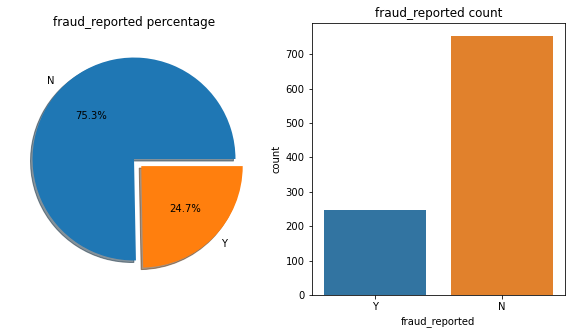

In [21]:
# This pieplot shows the percentage of the fraud_reported
f, ax = plt.subplots(1,2, figsize = (10,5))
fraud_detect['fraud_reported'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('fraud_reported percentage')
ax[0].set_ylabel('')

# This countplot shows the distribution of the fraud_reported
sns.countplot(x ='fraud_reported', data = fraud_detect,  ax = ax[1])
ax[1].set_title('fraud_reported count')
plt.show

We have 24.7% of fraud reported while 75.3% were not fraudulent claims.

<function matplotlib.pyplot.show(close=None, block=None)>

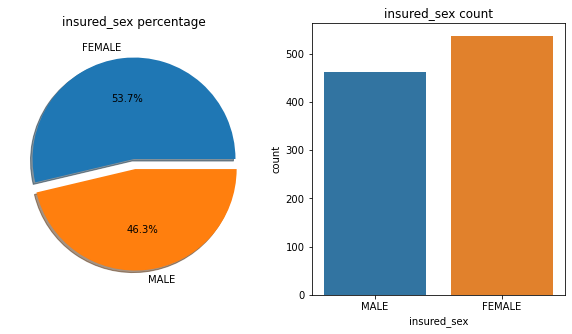

In [22]:
# This pieplot shows the percentage of insured_sex
f, ax = plt.subplots(1,2, figsize = (10,5))
fraud_detect['insured_sex'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('insured_sex percentage')
ax[0].set_ylabel('')

# This countplot shows the distribution of the passenger whether they survived or not
sns.countplot(x ='insured_sex', data = fraud_detect,  ax = ax[1])
ax[1].set_title('insured_sex count')
plt.show

We have more female than male that are insured.

In [23]:
#This returns the count of unique occurrences in the number_of_vehicles_involved column
fraud_detect['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

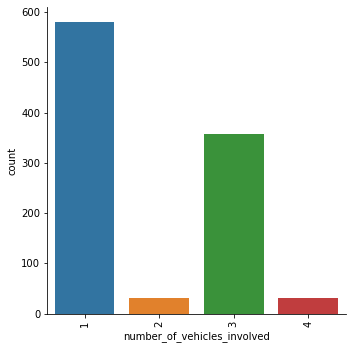

In [24]:
# This catplot shows the distribution of the authorities_contacted
sns.catplot(x ='number_of_vehicles_involved', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

We have 581 instances were only a single vehicle was involved in the incident.

In [25]:
#This returns the count of unique occurrences in the incident_severity column
fraud_detect['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

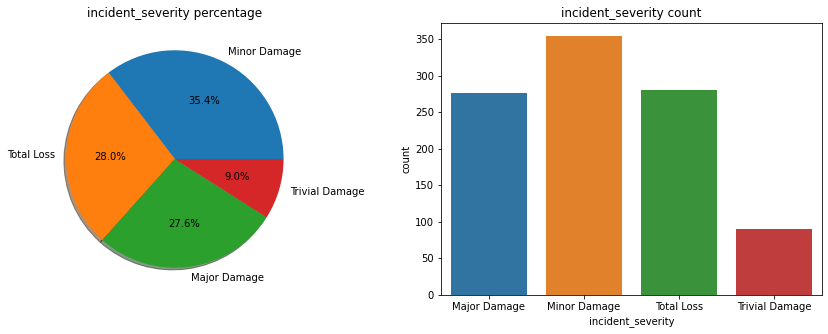

In [26]:
# This pieplot shows the percentage of the incident_severity
f, ax = plt.subplots(1,2, figsize = (15,5))
fraud_detect['incident_severity'].value_counts().plot.pie(labels = ['Minor Damage', 'Total Loss', 'Major Damage', 'Trivial Damage'], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('incident_severity percentage')
ax[0].set_ylabel('')

# This countplot shows the distribution of the incident_severity
sns.countplot(x ='incident_severity', data = fraud_detect,  ax = ax[1])
ax[1].set_title('incident_severity count')
plt.show

From the pie plot, we can see that the highest incident severity is considered as being minor. Means that most of the accidents were minor.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

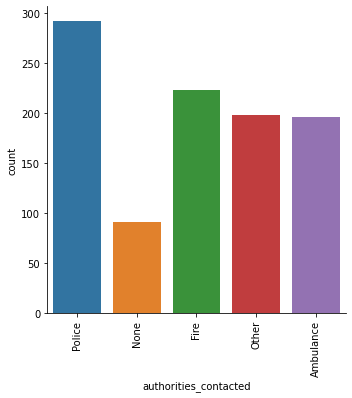

In [27]:
# This catplot shows the distribution of the authorities_contacted
sns.catplot(x ='authorities_contacted', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

We can see that the police was mostly contacted before other authorities.

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

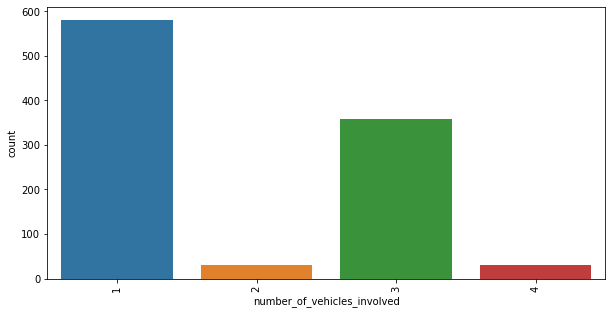

In [28]:
# This catplot shows the distribution of the number_of_vehicles_involved
plt.figure(figsize = (10,5))
sns.countplot(x ='number_of_vehicles_involved', data = fraud_detect)
plt.xticks(rotation = 90)

We have more of only one vehicle involved in the accident.

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

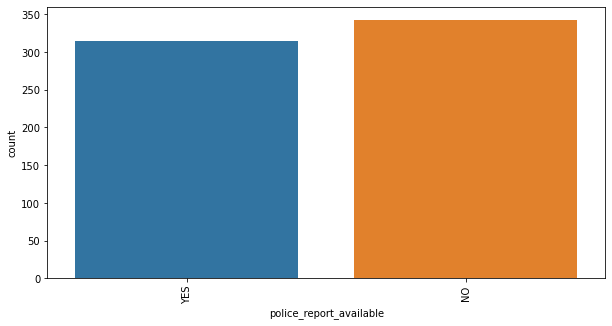

In [29]:
# This catplot shows the distribution of the police_report_available column
plt.figure(figsize = (10,5))
sns.countplot(x ='police_report_available', data = fraud_detect)
plt.xticks(rotation = 90)

More than half of the incidents reported for the period in review were not documented by the Police.

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

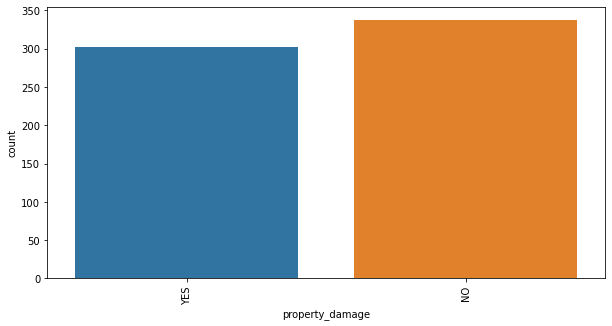

In [30]:
# This catplot shows the distribution of the property_damage column
plt.figure(figsize = (10,5))
sns.countplot(x ='property_damage', data = fraud_detect)
plt.xticks(rotation = 90)

We can see that in most cases the properties were not damaged.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

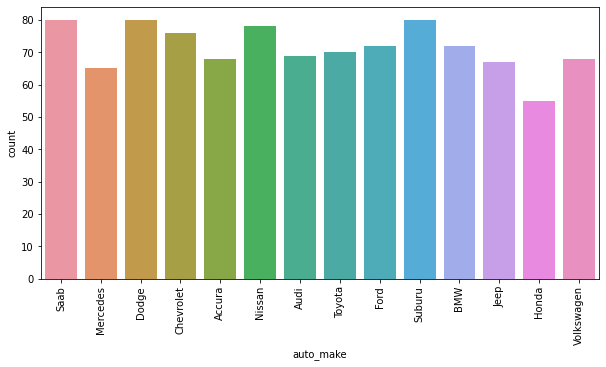

In [31]:
# This catplot shows the distribution of the auto_make column
plt.figure(figsize = (10,5))
sns.countplot(x ='auto_make', data = fraud_detect)
plt.xticks(rotation = 90)

More of the vehicles involved were of the make Saab, Dodge, Suburu, Nissan and Chevrolet.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

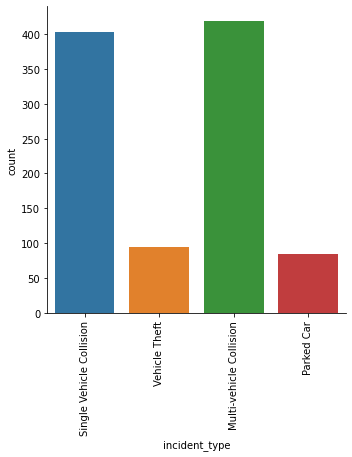

In [32]:
# This catplot shows the distribution of the incident_type column
sns.catplot(x ='incident_type', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

Most claim made by the customer was for multi-vehicle collision.

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

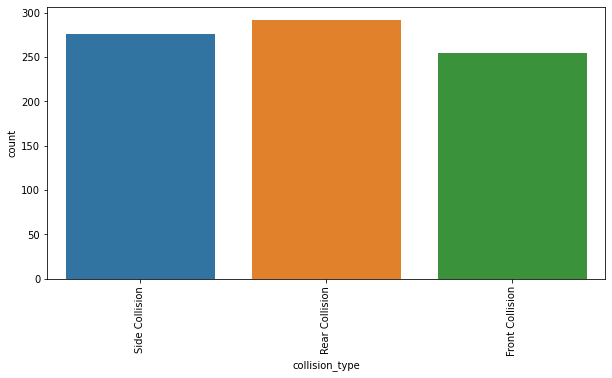

In [33]:
# This catplot shows the distribution of the collision_type column
plt.figure(figsize = (10,5))
sns.countplot(x ='collision_type', data = fraud_detect)
plt.xticks(rotation = 90)

The damage on the vehicles were mostly caused by Rear Collisions.occured from the Rear.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

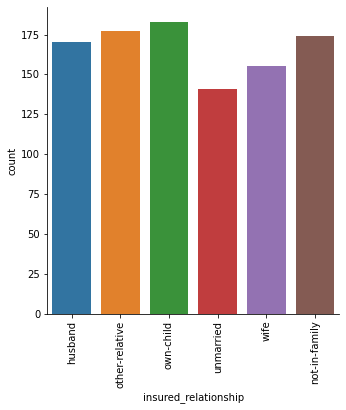

In [34]:
# This catplot shows the distribution of the insured_relationship column
sns.catplot(x ='insured_relationship', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

Most insured customer's relation is own-child.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

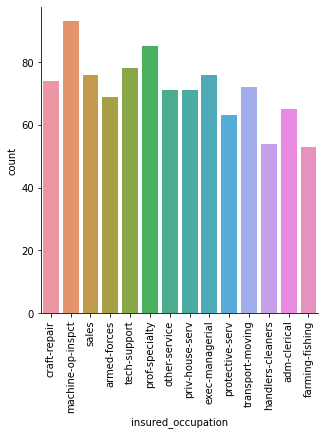

In [35]:
# This catplot shows the distribution of the incident_state column
sns.catplot(x ='insured_occupation', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

The occupation of most of the insured customers is machine op inspector.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

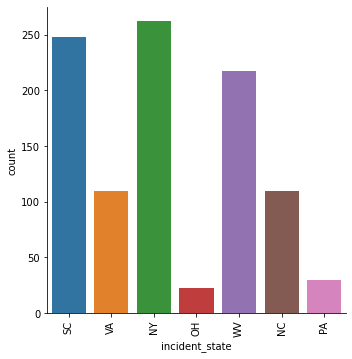

In [36]:
# This catplot shows the distribution of the incident_state column
sns.catplot(x ='incident_state', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

Most of the incidents occured at NY state.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

<Figure size 720x360 with 0 Axes>

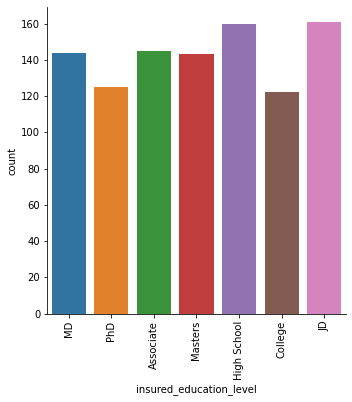

In [37]:
# This catplot shows the distribution of the insured_education_level
plt.figure(figsize = (10,5))
sns.catplot(x ='insured_education_level', data = fraud_detect, kind = 'count')
plt.xticks(rotation = 90)

Most constomer's educational level were JD and High School.

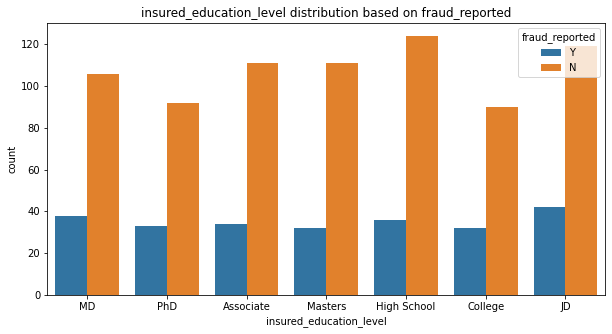

In [38]:
# countplot showing the insured_education_level based on fraud_reported
plt.figure(figsize = (10,5))
sns.countplot(x='insured_education_level', hue='fraud_reported', data=fraud_detect)
plt.title('insured_education_level distribution based on fraud_reported')
plt.show()

Fraud reported was higher with customers in the JD educational level. Probably because JD are into law profession.

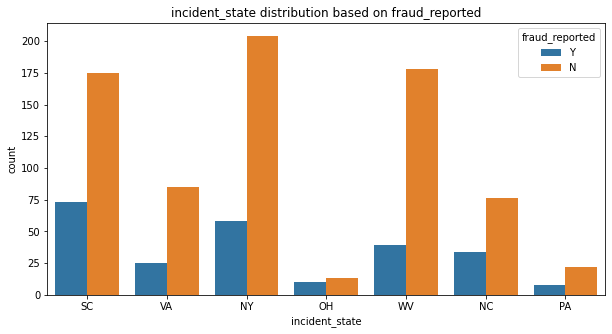

In [39]:
# countplot showing the incident_state based on fraud_reported
plt.figure(figsize = (10,5))
sns.countplot(x='incident_state', hue='fraud_reported', data=fraud_detect)
plt.title('incident_state distribution based on fraud_reported')
plt.show()

Fraud was reported more in the SC state. 

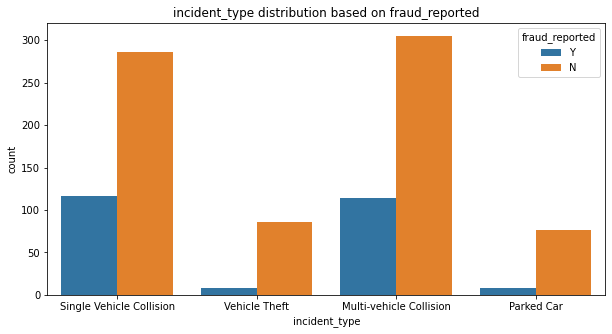

In [40]:
# countplot showing the incident_type based on fraud_reported
plt.figure(figsize = (10,5))
sns.countplot(x='incident_type', hue='fraud_reported', data=fraud_detect)
plt.title('incident_type distribution based on fraud_reported')
plt.show()


Fraud was reported for single and multiple vehicle collisions more.

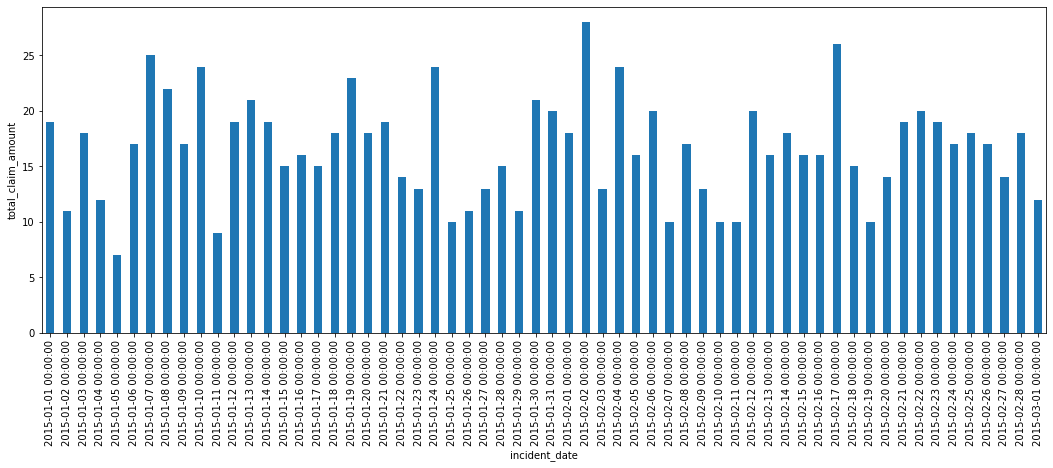

In [41]:
# countplot showing the total_claim_amount by incident_date
fig = plt.figure(figsize=(18,6))
ax = fraud_detect.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('total_claim_amount')
plt.show()

The total claim amount is for incidents that occured between the month of January and February 2015

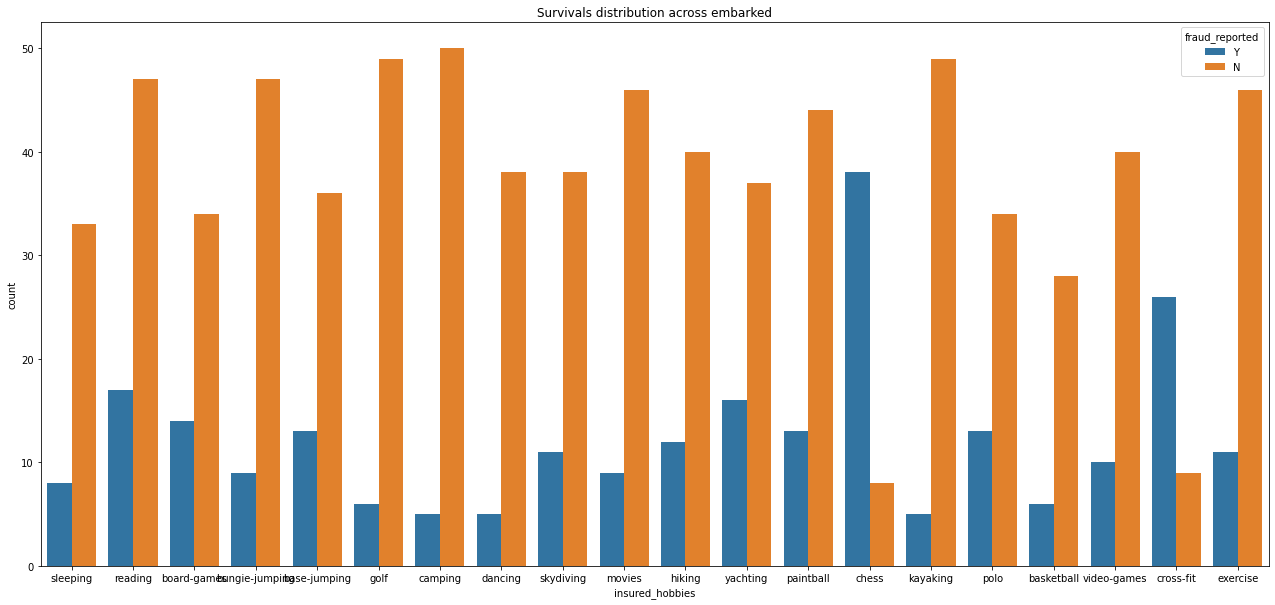

In [42]:
# countplot showing the insured_hobbies based on fraud_reported
plt.figure(figsize = (22,10))
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=fraud_detect)
plt.title('Survivals distribution across embarked')
plt.show()

Fraud was reported more amongst customers whose hobby is chess. Followed by cross-fit.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

<Figure size 1080x504 with 0 Axes>

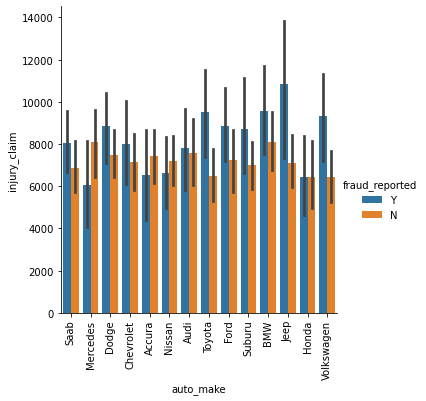

In [43]:
# catplot showing injury_claim across auto_make based on fraud_reported
plt.figure(figsize=(15,7))
sns.catplot(x='auto_make', y='injury_claim', hue='fraud_reported', data=fraud_detect, kind = 'bar')
plt.xticks(rotation = 90)

Fraud was reported for customers who sustained injury during the incidents with vehicle make, Jeep.

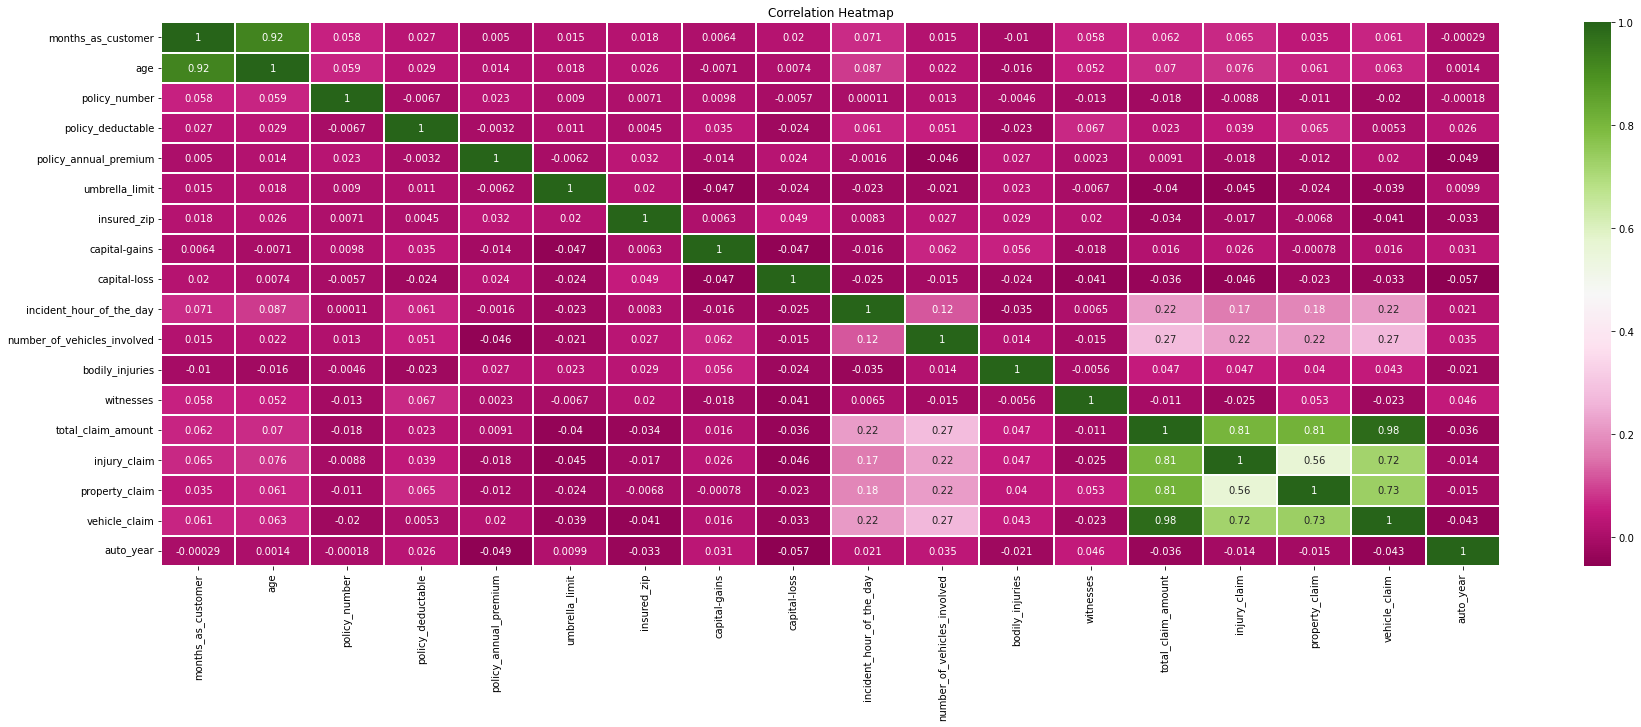

In [44]:
# Using heatmap to visualize the correlation between the numerical features.
plt.figure(figsize=(30,10))
sns.heatmap(fraud_detect.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

There is high correlation between:
##### 1) age and months_as_customer
##### 2) total_claim_amount and all the claims(Vehicle_claim, property_claim, injury_claim)
There's multicollinearity amongst these features.

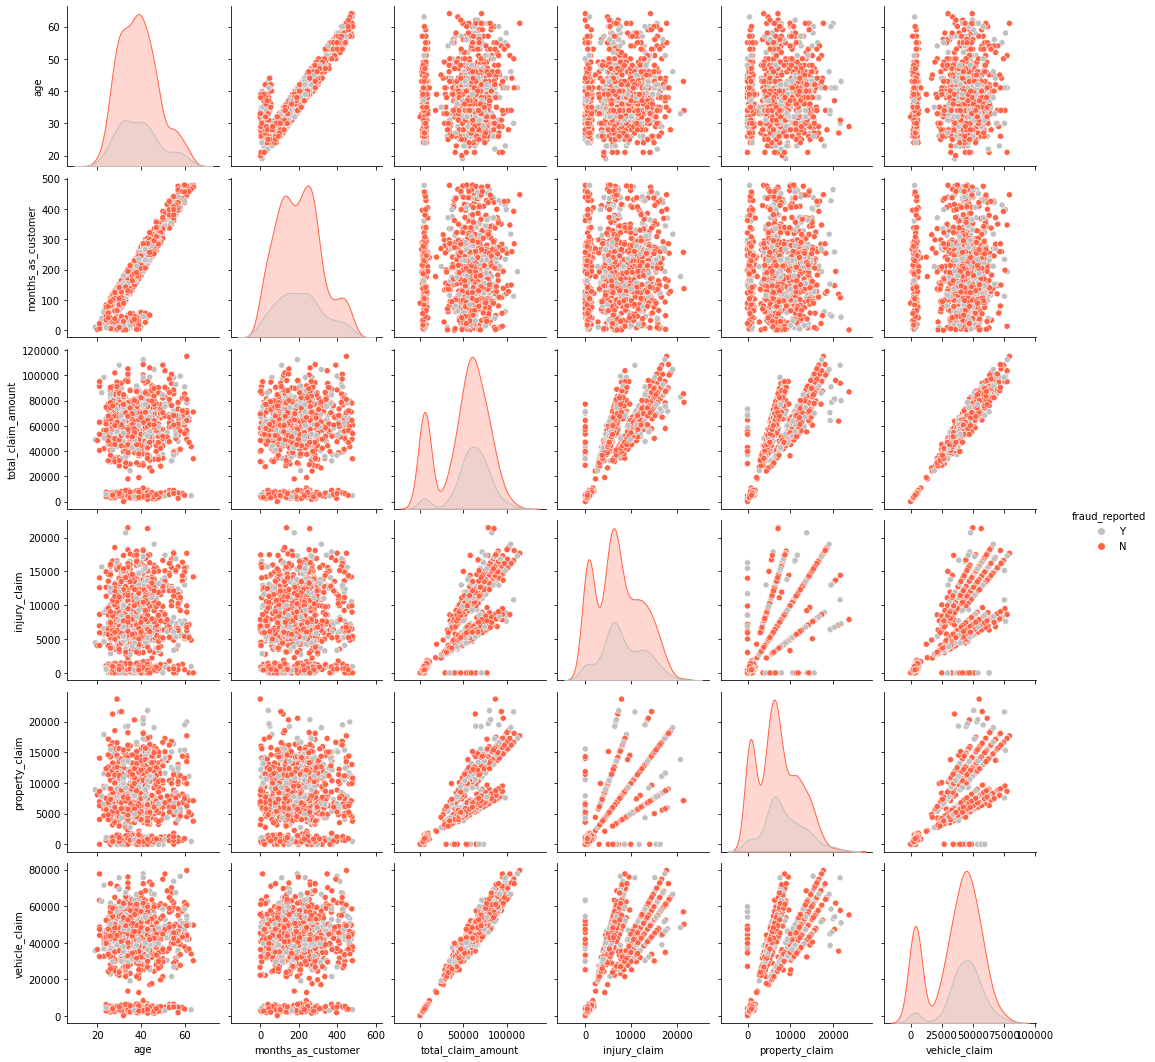

In [45]:
#pairplot showing the distribution of the stated variables
sns.pairplot(fraud_detect[['age','months_as_customer','total_claim_amount', 'injury_claim', 'property_claim','vehicle_claim', 'fraud_reported']],hue = 'fraud_reported', palette=['silver', 'tomato'])

From the pairplots, we can see that there is positive correlation between total_claim_amount, injury_claim, property_claim, vehicle_claim and the target variable (fraud_reported). Fraud reported tends to increase as claims increase. Age and months_as_customer does not show any relationship with the target variable. 

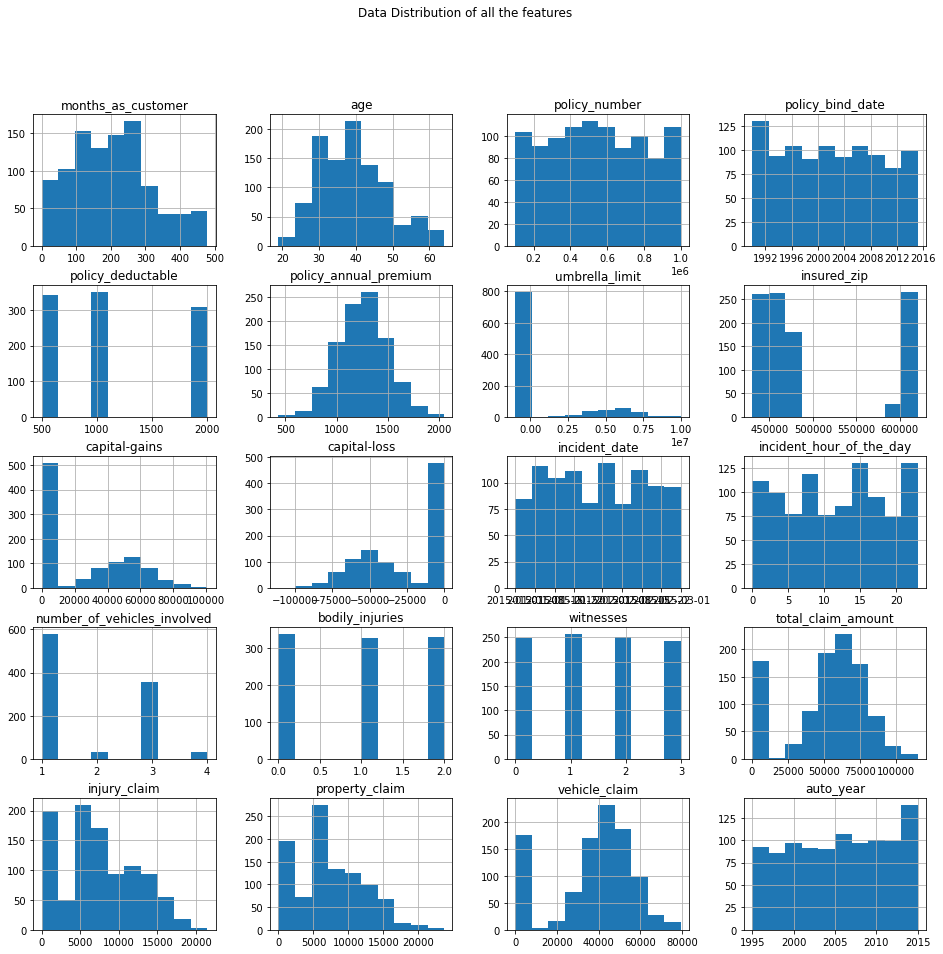

In [46]:
# Histogram containing all the columns
fraud_detect.hist(bins=10, figsize=(16,15))
plt.suptitle("Data Distribution of all the features")
plt.show()

From the histograms above, we can see that only the policy_annual_premium column seems to be normally distributed.

## Data Pre-Processing

In [47]:
#checking for missing values
fraud_detect.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [48]:
#gets the mode of each column and fill in the missing values
fraud_detect['collision_type'].fillna(fraud_detect['collision_type'].mode()[0], inplace = True)
fraud_detect['property_damage'].fillna(fraud_detect['property_damage'].mode()[0], inplace = True)
fraud_detect['police_report_available'].fillna(fraud_detect['police_report_available'].mode()[0], inplace = True)

In [49]:
#checking for missing values after fill in the missing values
fraud_detect.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

No more missing values

In [50]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(fraud_detect.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 fraud_detect[i] = le.fit_transform(fraud_detect[i])
fraud_detect.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

We converted our categorical variables into numerical variables uong the label encoder.

In [51]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = fraud_detect.iloc[:,:-1]
calc_vif(X)

C:\Users\Omen\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variables,VIF Value
0,months_as_customer,28.396107
1,age,131.449946
2,policy_number,5.679488
3,policy_bind_date,4.073173
4,policy_state,2.590064
5,policy_csl,2.472388
6,policy_deductable,4.632681
7,policy_annual_premium,28.483295
8,umbrella_limit,1.272279
9,insured_zip,51.144502


Our total_claim_amount, injury_claim, property_claim and vehicle_claim has 'inf' as it's VIF value. This happens when there is a perfect correlation between the variables. To resolve this, we are going to drop of the features, and see what happens.

In [52]:
#Dropping RI (has highest vif value)
X = fraud_detect.drop(['auto_year','age','insured_zip','policy_annual_premium','number_of_vehicles_involved','total_claim_amount','vehicle_claim'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,months_as_customer,4.178219
1,policy_number,5.342754
2,policy_bind_date,3.872642
3,policy_state,2.544723
4,policy_csl,2.430041
5,policy_deductable,4.296457
6,umbrella_limit,1.275315
7,insured_sex,1.864925
8,insured_education_level,3.341903
9,insured_occupation,3.590298


The inf value is no longer seen after we dropped the total_claim_amount column.

In [53]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,fraud_reported
0,1.078140,-0.095953,1.712038,1.187173,0.060937,-0.222383,-0.479476,1.076953,0.530931,-1.158316,...,-0.956261,1.520282,0.009759,0.461838,1.478078,-0.189283,1.165505,0.856466,-1.645743,1.746019
1,0.208995,-0.791527,0.599844,-0.016856,0.060937,1.412784,1.697980,1.076953,0.530931,-0.162558,...,-0.524475,-0.657773,-1.210174,-1.338700,-0.676554,-1.363822,-1.372696,0.360539,-0.657470,1.746019
2,-0.608002,0.550566,-0.209687,1.187173,-1.182668,1.412784,1.697980,-0.928546,1.557877,1.082141,...,-0.668404,-0.657773,1.229693,1.362107,-0.676554,0.054644,-0.736072,-0.631315,0.959702,-0.572731
3,0.452355,-1.239334,-1.646422,-1.220886,0.060937,1.412784,2.133471,-0.928546,1.557877,-1.407256,...,-0.956261,-0.657773,0.009759,0.461838,-0.676554,-0.224130,-0.219722,-0.879279,1.319074,1.746019
4,0.208995,-0.695834,1.646400,-1.220886,1.304542,-0.222383,2.133471,1.076953,-1.522961,1.082141,...,1.202666,-0.657773,-1.210174,-0.438431,-0.676554,-1.257232,-1.399654,-1.623169,1.049545,-0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,1.539740,-1.471388,1.187173,1.304542,-0.222383,-0.479476,-0.928546,1.044404,-1.158316,...,1.202666,1.520282,-1.210174,-0.438431,-0.676554,2.051155,0.273817,-0.135388,-1.196528,-0.572731
996,0.704407,-1.398429,1.591702,-1.220886,-1.182668,-0.222383,-0.479476,-0.928546,1.557877,0.584261,...,1.634452,1.520282,1.229693,1.362107,-0.676554,2.182342,2.214794,1.600357,0.780016,-0.572731
997,-0.642767,1.448920,0.158613,1.187173,0.060937,-1.039966,0.826998,-0.928546,1.044404,-1.407256,...,-1.100189,-0.657773,1.229693,1.362107,1.478078,0.013648,0.020826,1.104430,-0.028570,-0.572731
998,2.208028,-0.047867,1.314565,-1.220886,1.304542,1.412784,1.697980,1.076953,-1.522961,-0.411497,...,-1.388046,-0.657773,-1.210174,-0.438431,1.478078,-0.453708,-0.451976,-1.375206,-1.286371,-0.572731


In [54]:
# selecting our dependent variable (label) and target variable (y)
x = fraud_detect.drop('fraud_reported',axis=1)
y = fraud_detect['fraud_reported']

We dropped the fraud_reported variable which is our target variable from the list of features in our dataset. We are going to be predicting whether or not fraud was reported for insurance claim. 

### Feature Importance

DecisionTreeClassifier(criterion='entropy')


,Feature Name,Importance score
20,incident_severity,0.218630
13,insured_hobbies,0.216430
9,insured_zip,0.062221
2,policy_number,0.036386
37,auto_year,0.034870
7,policy_annual_premium,0.031138
23,incident_city,0.030390
12,insured_occupation,0.026832
17,incident_date,0.026624
24,incident_location,0.026356


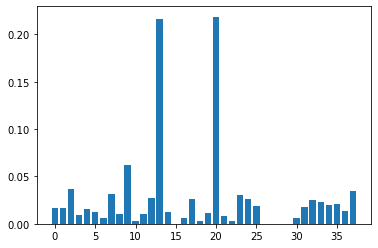

In [55]:
# feature importance using decision tree classifier
decisionTree = DecisionTreeClassifier(criterion='entropy')

print(decisionTree)

dtc_model = decisionTree.fit(x, y)

importance = dtc_model.feature_importances_

# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)

feature_importance = pd.DataFrame({
    "Feature Name": x.columns,
    "Importance score": dtc_model.feature_importances_
})
feature_importance.sort_values(by="Importance score", ascending=False)

From the feature importance, we can see the importance of each features to our model. A feature will have a greater impact on the model used to forecast a certain variable if it has a higher score. We can see that incident_severity	and insured_hobbies	have the highest importance score. We can say that the severity of the incident and that hobby of the individual have greater impact on whether or not fraud will be reported.

In [56]:
#This returns the count of unique occurrences in the fraud_reported column
fraud_detect['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

We need to balance our class using th SMOTE algorithm

In [57]:
#Using SMOTE algorithm to balance the fraud_reported variable
oversam = SMOTE()
X_resam, y_resam = oversam.fit_resample(x, y)
y_resam.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

Our class counts are now balanced.

# Model Building

In [58]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resam, y_resam, test_size = 0.25, random_state = 42)

# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1129, 38), (377, 38), (1129,), (377,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 75% of our data will be used to train the model while 25% will be used for model validation.

## 1. Xgboost Classifier

In [59]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.8859416445623343


[[151  26]
 [ 17 183]]


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       177
           1       0.88      0.92      0.89       200

    accuracy                           0.89       377
   macro avg       0.89      0.88      0.89       377
weighted avg       0.89      0.89      0.89       377



#### Cross Validation Score for Xgboost Classifier

In [60]:
results = []
scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()
print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')
diff = accuracy - mean_score

results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.88053097 0.84513274 0.89823009 0.88495575 0.93333333]
Mean accuracy: 0.89


The difference between the accuracy score and the cross validation score is: -0.0024949336087570773


## 2. Random Forest

In [61]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.87


[[155  22]
 [ 26 174]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       177
           1       0.89      0.87      0.88       200

    accuracy                           0.87       377
   macro avg       0.87      0.87      0.87       377
weighted avg       0.87      0.87      0.87       377



#### Cross Validation Score for Random Forest

In [62]:
scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.87610619 0.81858407 0.88053097 0.86283186 0.89333333]
Mean accuracy: 0.87


The difference between the accuracy score and the cross validation score is: 0.0064017589571448985


## 3. Decision Tree

In [63]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Decision Tree: 0.82


[[148  29]
 [ 38 162]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       177
           1       0.85      0.81      0.83       200

    accuracy                           0.82       377
   macro avg       0.82      0.82      0.82       377
weighted avg       0.82      0.82      0.82       377



### Cross Validation Score for Decision Tree

In [64]:
scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.79646018 0.78318584 0.83185841 0.84955752 0.84      ]
Mean accuracy: 0.82


The difference between the accuracy score and the cross validation score is: 0.0020687777282224484


## 4. Adaboost classifier

In [65]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_ab)
print(confusion_matrix(y_test, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.8541114058355438


[[144  33]
 [ 22 178]]


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       177
           1       0.84      0.89      0.87       200

    accuracy                           0.85       377
   macro avg       0.86      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



#### Cross Validation Score for Adaboost classifier

In [66]:
scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.86283186 0.79646018 0.8539823  0.88053097 0.88888889]
Mean accuracy: 0.86


The difference between the accuracy score and the cross validation score is: -0.0024274338891364655


## 5. Gradient Boosting Classifier

In [67]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.8938992042440318


[[152  25]
 [ 15 185]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       177
           1       0.88      0.93      0.90       200

    accuracy                           0.89       377
   macro avg       0.90      0.89      0.89       377
weighted avg       0.89      0.89      0.89       377



#### Cross Validation Score for Gradient Boosting Classifier

In [68]:
scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.87168142 0.82743363 0.88938053 0.86725664 0.92888889]
Mean accuracy: 0.88


The difference between the accuracy score and the cross validation score is: 0.01697098398837793


In [69]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Xgboost Classifier,0.885942,0.888437,-0.002495
1,Random Forest,0.872679,0.866277,0.006402
2,Decision Tree,0.822281,0.820212,0.002069
3,Adaboost classifier,0.854111,0.856539,-0.002427
4,Gradient Boosting Classifier,0.893899,0.876928,0.016971


In [70]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Xgboost Classifier


### Model Selection

For the Insurance Claim Fraud prediction, we selected the Xgboost classifier as our best model because it had the smallest value after the accuracy score was subtracted from the cross validation score.

#### ROC curve  and AUC of the best model

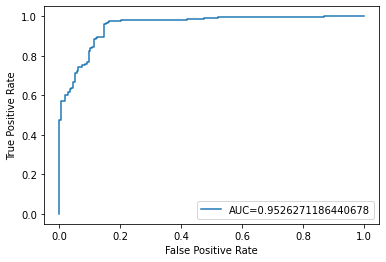

In [71]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 95%

In [72]:
from sklearn.model_selection import GridSearchCV

model_best = XGBClassifier()

model_param = {'n_estimators': [100,500,550],
    'max_depth': [None],
    'learning_rate':[0.1,0.5],
    'gamma':[0,0.5,1,2,3],
    'sampling_method': ['uniform']
    }

In [73]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [74]:
#display the best parameters from the search
print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
      "\nThe best gamma: " + str(gd_search.best_params_["gamma"]),
     "\nThe best sampling_method: " + str(gd_search.best_params_["sampling_method"]))

The best n_estimators is : 500 
The best max_depth: None 
The best learning_rate: 0.5 
The best gamma: 0 
The best sampling_method: uniform


In [75]:
# train the model with the selected parameters
claimfraud_model = XGBClassifier(n_estimators  = 500, max_depth = None, learning_rate = 0.5, gamma = 0, sampling_method = 'uniform')
claimfraud_model.fit(X_train, y_train)
y_pred = claimfraud_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9045092838196287

In [76]:
import pickle
# save the model to disk
filename = 'claimfraud_predict.sav'
pickle.dump(claimfraud_model, open(filename, 'wb'))

In [77]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
accuracy_dataframe

,Actual,Predicted
578,0,0
1145,1,1
382,1,1
583,0,0
966,0,0
...,...,...
48,0,0
1120,1,1
155,1,1
1252,1,1


In [78]:
#This will revert the encoding done for the fraud_reported column
accuracy_dataframe['Actual']= le.inverse_transform(accuracy_dataframe['Actual'])
accuracy_dataframe['Predicted']= le.inverse_transform(accuracy_dataframe['Predicted'])
accuracy_dataframe

,Actual,Predicted
578,N,N
1145,Y,Y
382,Y,Y
583,N,N
966,N,N
...,...,...
48,N,N
1120,Y,Y
155,Y,Y
1252,Y,Y


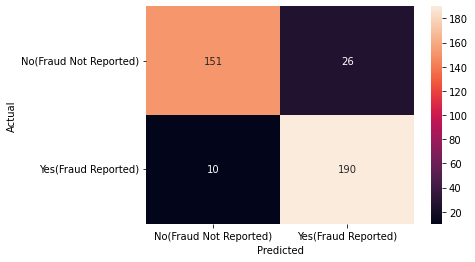

In [79]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['No(Fraud Not Reported)', 'Yes(Fraud Reported)']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

This is a binary classification problem because the target variable is classified into two categories (No or Yes). We used the Automobile_insurance_fraud dataset to analyse whether an insurance claim is fraudulent or not based on the features provided. The dataset is made up 1000 rows and 40 columns. Of these columns, we have 39 independent variables and 1 target variable(fraud_reported). We visualized the relationships between some features.

Some of the observations recorded are:

#### 1) We have 24.7% of fraud reported while 75.3% were not fraudulent claims.
#### 2) We have more female than male that are insured.
#### 3) More than half of the incidents reported for the period in review were not documented.
#### 4) More than half of the incidents reported for the period in review were not documented by the Police.


We used different algorithms to train our model. 75% of the data was used for taining while 25% was used for validation. The criteria we used in the selection of best model is accuracy and cross validation score. We calculated the difference between these scores and selected the algorithm that had the lowest result. Xgboost Classifier was selected as our best model because it had a lower difference between accuracy and cross validation score. We tuned our best model with Grid SearchCV. The accuracy score before tuning was 0.885942 and after training our model with the best selected parameters, the model's accuracy increased  to 0.904509. There was an improvement in the accuracy after tuning. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict all correctly. We can also see from the confusion matrix that the model predicted that 151 Frauds were not reported and actually no fraud was reported(True Negative). It predicted 190 fraud reported and fraud was reported(True Positive). The model predicted that 10 Frauds were not reported whereas, fraud was reported(False Negative). Predicted 26 Fraud reported but actually no fraud was reported(False Positive). Our model is performing well with the data we have.